In [28]:
import pandas as pd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "train-preprocessed.csv"
# Read the csv file into a dataframe
df = pd.read_csv(file_name, sep = r'\s+', quotechar = '"')

# Drop columns for artist, track and album
columns_to_drop = ['Artist', 'Track', 'Album', 'Index']
df = df.drop(columns=columns_to_drop)

In [29]:
# First we are going to perform an EDA
print(df.describe(include='all'))

       danceability       energy     loudness  speechiness  acousticness  \
count   7593.000000  7593.000000  7593.000000  7593.000000   7593.000000   
mean       0.565941     0.554640    -9.722472     0.068112      0.378637   
std        0.174872     0.255338     6.081434     0.075847      0.348719   
min        0.000000     0.000269   -49.576000     0.000000      0.000002   
25%        0.458000     0.377000   -11.369000     0.033800      0.046200   
50%        0.580000     0.586000    -7.992000     0.042100      0.264000   
75%        0.692000     0.757000    -5.874000     0.063200      0.715000   
max        0.969000     1.000000     0.520000     0.938000      0.996000   

       instrumentalness     liveness        tempo        length  \
count       7593.000000  7593.000000  7593.000000  7.593000e+03   
mean           0.179472     0.169955   118.943364  2.246171e+05   
std            0.323252     0.139368    29.329849  7.429394e+04   
min            0.000000     0.018500     0.0000

We observe that person C has a very low number of songs in the dataset. And that most of the songs listened by C are also listened by D. This might be due to the fact that C only listens to songs when he/she is with D or they have a shared playlist.
A and B are the most active when listening to music, sharing a high number of songs between them. However this can be a coincidence listening to the same popular songs. Because when they are intersected with an extra third person either C or D the shared song largely drops. From this we could infer that C and D might be closer (friends or couple) than they are with A and B.

In [30]:
playlists = ['A', 'B', 'C','D', 'AnB', 'AnC', 'AnD', 'BnC', 'BnD', 'CnD', 'AnBnC', 'AnBnD', 'AnCnD', 'BnCnD', 'AnBnCnD']
for playlist in playlists:
    print(f"Number of songs in {playlist}: {df[playlist].sum()}")

Number of songs in A: 2883
Number of songs in B: 3831
Number of songs in C: 92
Number of songs in D: 1284
Number of songs in AnB: 321
Number of songs in AnC: 27
Number of songs in AnD: 46
Number of songs in BnC: 23
Number of songs in BnD: 77
Number of songs in CnD: 45
Number of songs in AnBnC: 11
Number of songs in AnBnD: 12
Number of songs in AnCnD: 10
Number of songs in BnCnD: 0
Number of songs in AnBnCnD: 2


In [31]:
# Convert the 'time_signature' column to a category
df['time_signature'] = df['time_signature'].astype('category')

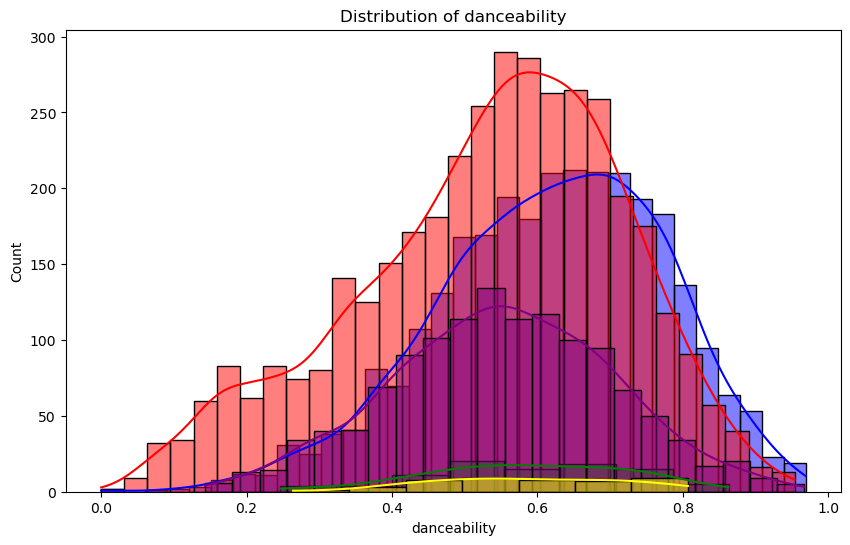

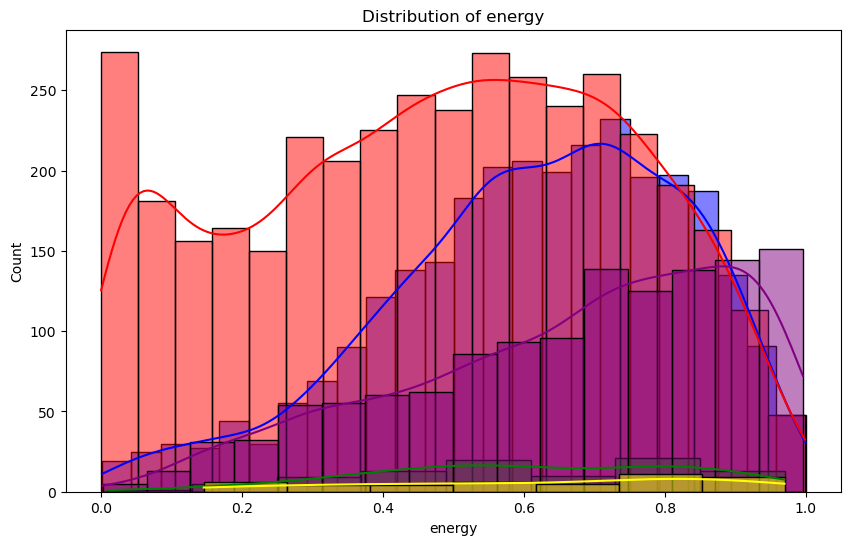

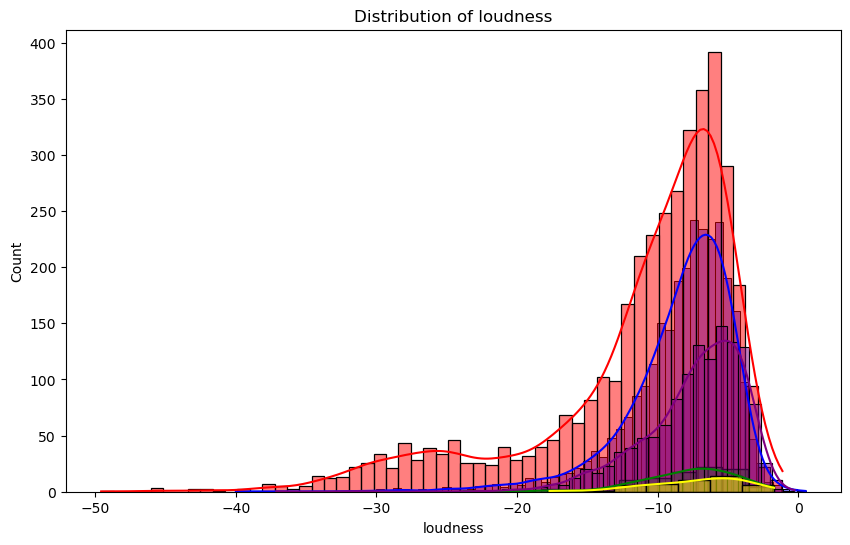

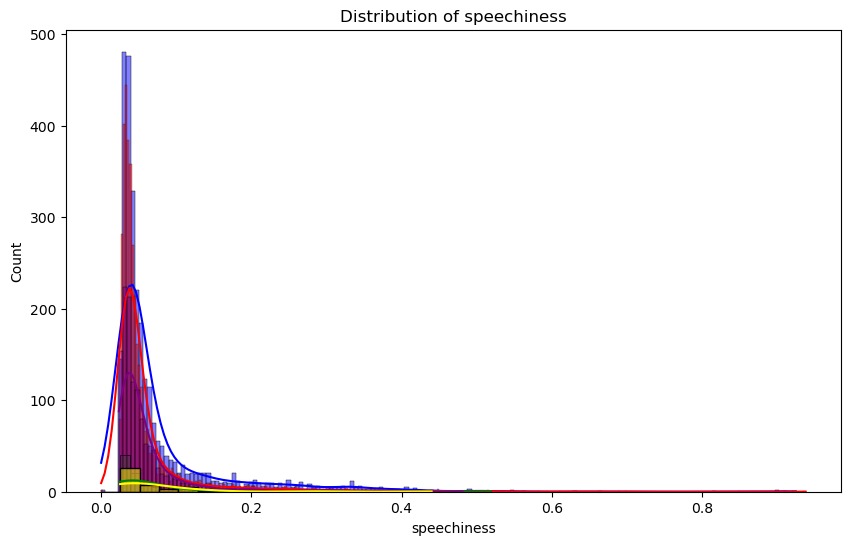

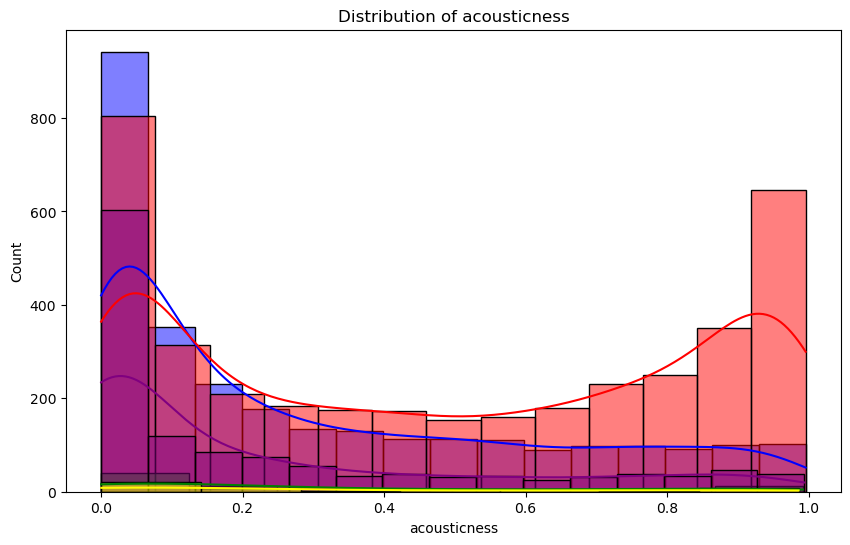

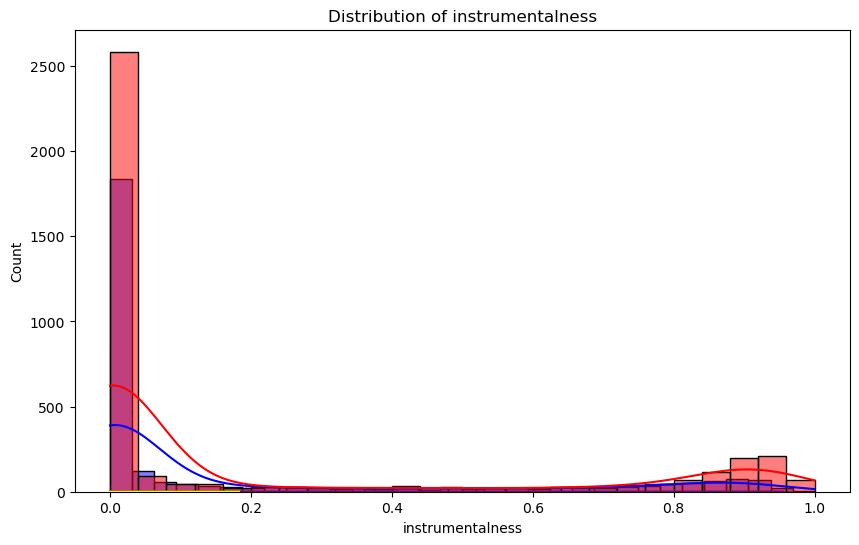

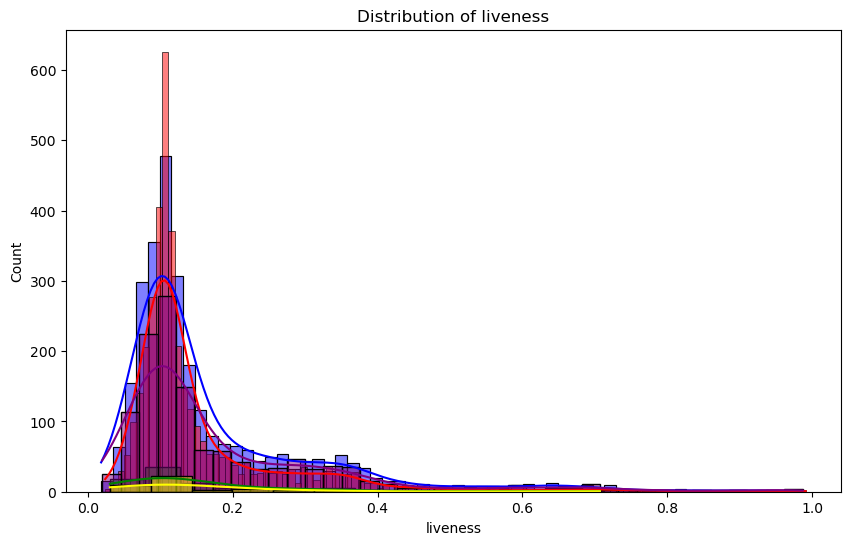

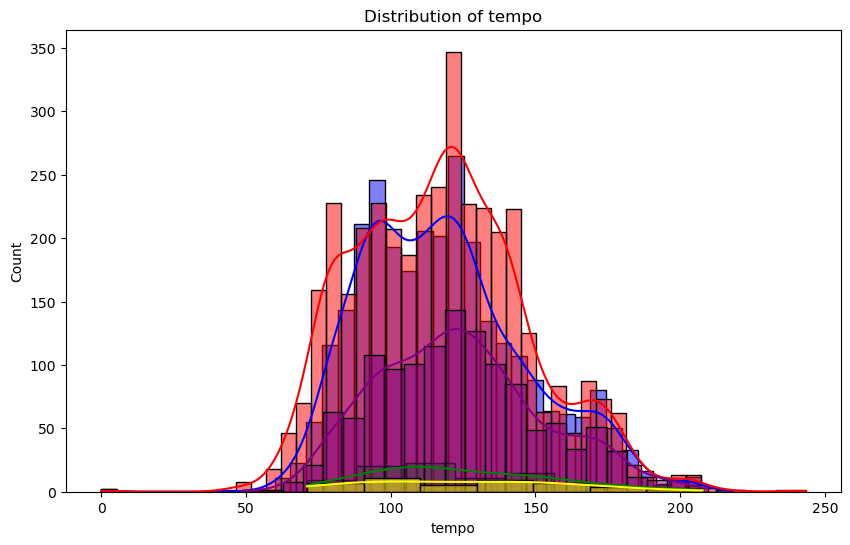

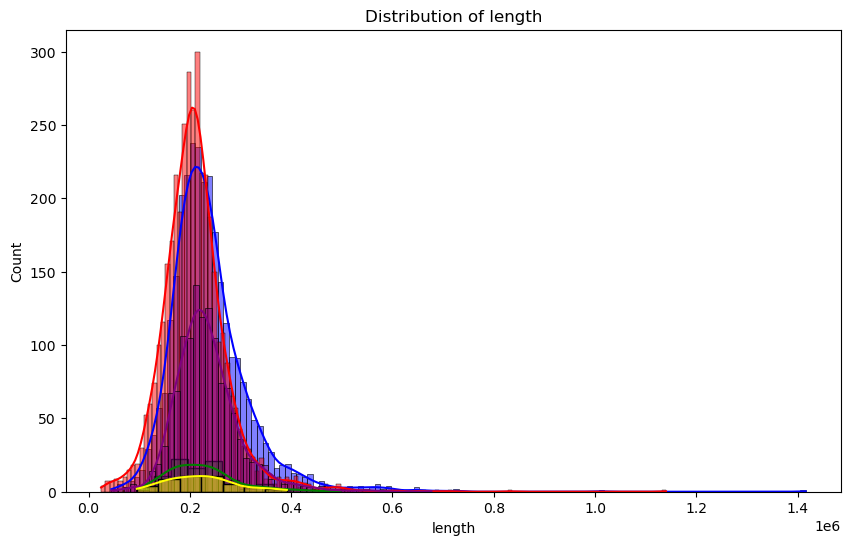

In [32]:
# Histogram of the different features
import matplotlib.pyplot as plt
import seaborn as sns
df_A = df[df['A']==1]
df_B = df[df['B']==1]
df_C = df[df['C']==1]
df_D = df[df['D']==1]
df_CD = df[df['CnD']==1]

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'length']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_A[feature], kde=True, color='blue', label='A')
    sns.histplot(df_B[feature], kde=True, color='red', label='B')
    sns.histplot(df_C[feature], kde=True, color='green', label='C')
    sns.histplot(df_D[feature], kde=True, color='purple', label='D')
    sns.histplot(df_CD[feature], kde=True, color='yellow', label='CnD')
    plt.title(f'Distribution of {feature}')
    plt.show()

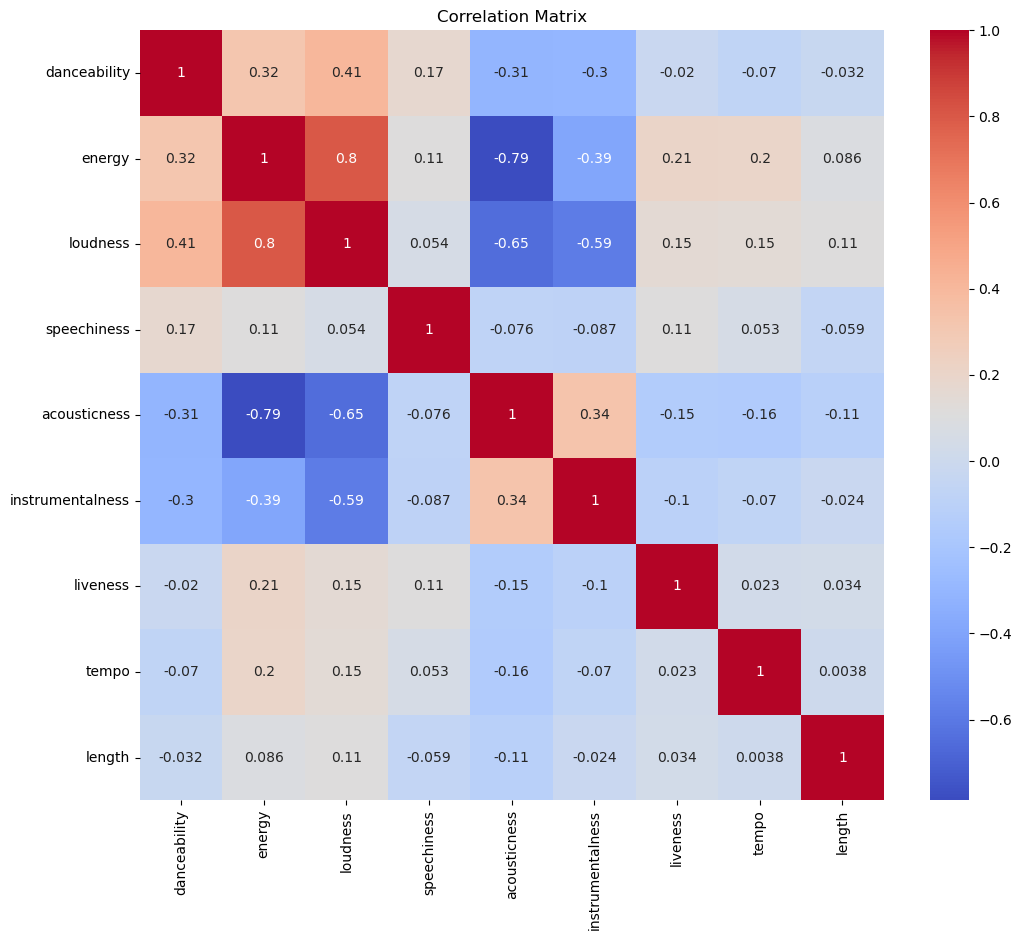

In [33]:
# Correlation between variables
correlation = df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Perform PCA 
# Standardise the data
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)  # Reducing data to 2 principal components for visualization
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components, columns=['x', 'y'])

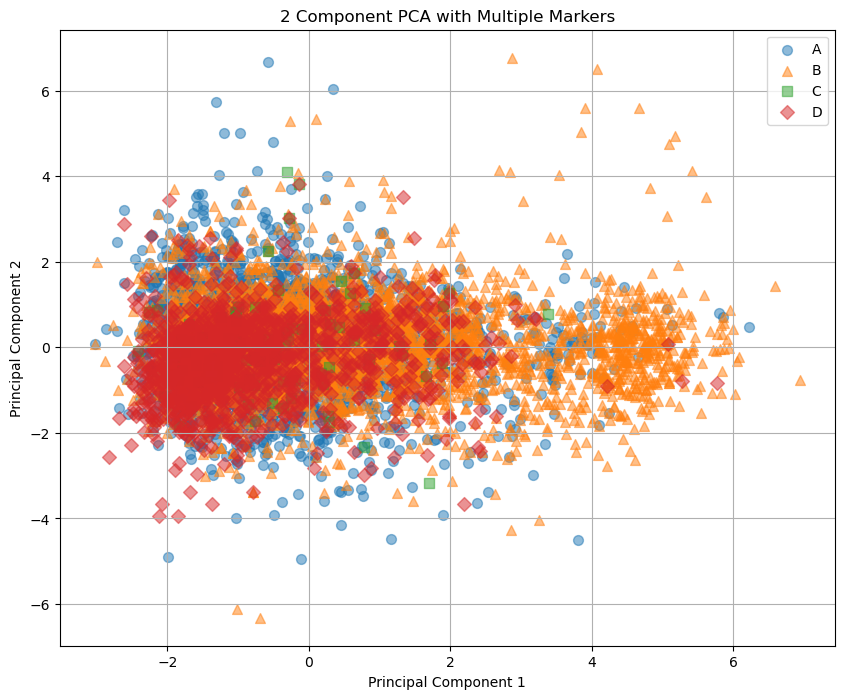

In [35]:
# Define a marker for each person
persons = ['A', 'B', 'C', 'D']
markers = {'A': 'o', 'B': '^', 'C': 's', 'D': 'D'}

plt.figure(figsize=(10, 8))

for person, marker in markers.items():
    idx_to_keep = df[person] == 1
    plt.scatter(principal_df.loc[idx_to_keep, 'x'],
                principal_df.loc[idx_to_keep, 'y'],
                marker=marker, s=50, label=person, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with Multiple Markers')
plt.legend()
plt.grid(True)
plt.show()


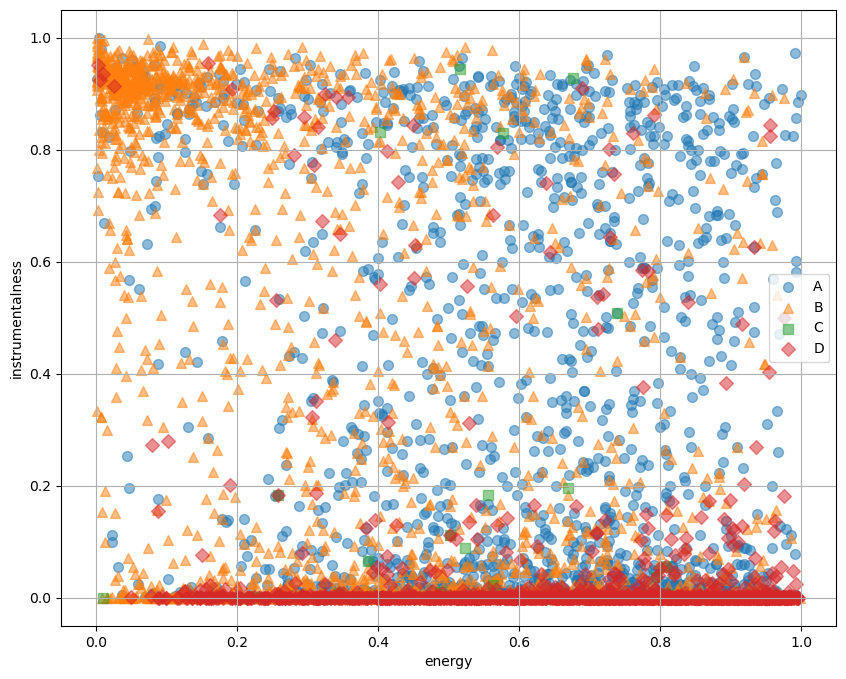

In [18]:
# Define a marker for each person
persons = ['A', 'B', 'C', 'D']
markers = {'A': 'o', 'B': '^', 'C': 's', 'D': 'D'}

plt.figure(figsize=(10, 8))

for person, marker in markers.items():
    idx_to_keep = df[person] == 1
    plt.scatter(df.loc[idx_to_keep, 'energy'],
                df.loc[idx_to_keep, 'instrumentalness'],
                marker=marker, s=50, label=person, alpha=0.5)

plt.xlabel('energy')
plt.ylabel('instrumentalness')
plt.legend()
plt.grid(True)
plt.show()

It seems that B prefers more instrumental music.

We have written code to try to obtain the genre of each song as it is a valuable feature for our dataset but the code has stopped half-way when downloading the extra data.